In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# (Optional) Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load employee data from CSV
df = pd.read_csv('employee_data.csv')
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [3]:
df.filed_complaint.fillna(0, inplace=True)
df.recently_promoted.fillna(0, inplace=True)

In [4]:
df['salary_numeric'] = df.salary.replace({'low': 0, 'medium': 1, 'high': 2})

In [5]:
# Dataframe dimensions
df.shape

(14249, 11)

In [6]:
# Column datatypes
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
salary_numeric         int64
dtype: object

In [7]:
# First 10 rows of data
df.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,salary_numeric
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0
1,232,support,0.0,NaN,3,0.0,low,0.834544,Employed,2.0,0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,1
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0
5,140,sales,0.0,0.589097,4,0.0,medium,0.660020,Employed,4.0,1
6,121,sales,1.0,0.625399,3,0.0,low,0.835571,Employed,3.0,0
7,150,engineering,0.0,0.644586,4,0.0,low,0.796683,Employed,3.0,0
8,215,engineering,1.0,0.524114,3,0.0,medium,0.715005,Employed,7.0,1
9,269,support,0.0,0.909364,5,0.0,medium,0.994037,Employed,2.0,1


In [8]:
# Last 10 rows of data
df.tail(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,salary_numeric
14239,242,finance,0.0,0.781112,6,0.0,low,0.669866,Left,5.0,0
14240,131,engineering,0.0,0.531197,2,0.0,low,0.341842,Left,3.0,0
14241,235,IT,0.0,0.683498,3,0.0,medium,0.923564,Employed,3.0,1
14242,157,support,0.0,0.707167,5,0.0,low,0.834708,Employed,4.0,0
14243,272,engineering,0.0,0.815504,4,0.0,low,0.693387,Employed,2.0,0
14244,178,IT,0.0,0.735865,5,0.0,low,0.263282,Employed,5.0,0
14245,257,sales,0.0,0.638604,3,0.0,low,0.868209,Employed,2.0,0
14246,232,finance,1.0,0.847623,5,0.0,medium,0.898917,Left,5.0,1
14247,130,IT,0.0,0.757184,4,0.0,medium,0.641304,Employed,3.0,1
14248,159,NaN,0.0,0.578742,3,0.0,medium,0.808850,Employed,3.0,1


In [9]:
# Summarize numerical features
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_numeric
count,14249.000000,14249.000000,12717.000000,14249.000000,14249.000000,14068.000000,14068.000000,14249.000000
mean,199.795775,0.144431,0.718477,3.773809,0.021054,0.621295,3.497228,0.592884
std,50.998714,0.351539,0.173062,1.253126,0.143570,0.250469,1.460917,0.634788
min,49.000000,0.000000,0.316175,1.000000,0.000000,0.040058,2.000000,0.000000
25%,155.000000,0.000000,0.563866,3.000000,0.000000,0.450390,3.000000,0.000000
50%,199.000000,0.000000,0.724939,4.000000,0.000000,0.652527,3.000000,1.000000
75%,245.000000,0.000000,0.871358,5.000000,0.000000,0.824951,4.000000,1.000000
max,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000,2.000000


In [10]:
# Summarize categorical features
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


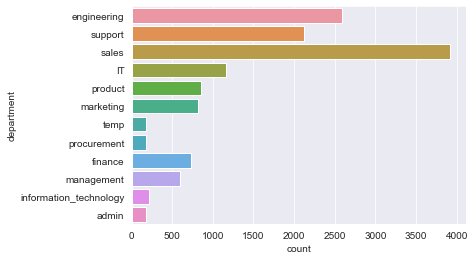

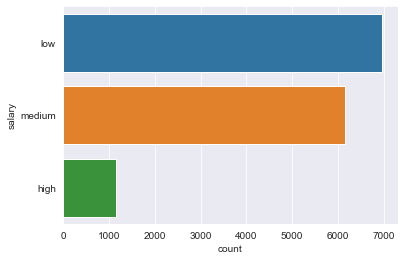

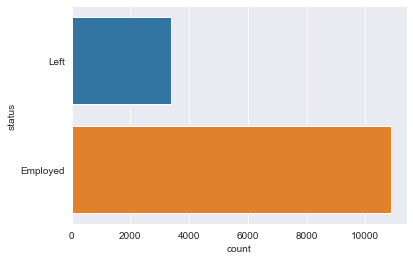

In [11]:
# Plot bar plot for each categorical feature
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

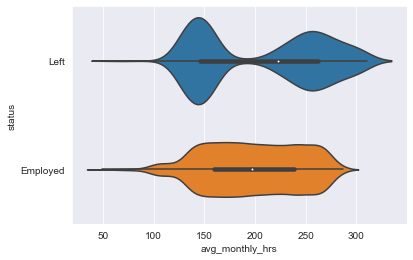

In [12]:
# Segment satisfaction by status and plot distributions
sns.violinplot(y='status', x='avg_monthly_hrs', data=df)
plt.show()

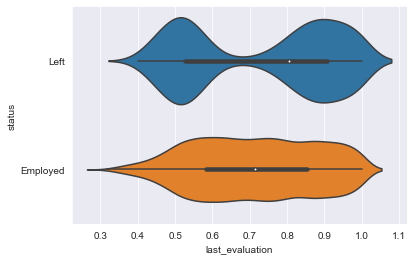

In [13]:
# Segment last_evaluation by status and plot distributions
sns.violinplot(y='status', x='last_evaluation', data=df)
plt.show()

In [14]:
# Segment by status and display the means within each class
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_numeric
status,,,,,,,,
Employed,197.700286,0.175187,0.714479,3.755273,0.025974,0.675979,3.380245,0.648061
Left,206.502948,0.045991,0.730706,3.833137,0.005307,0.447500,3.869023,0.416274


In [15]:
df.department.replace('information_technology', 'IT', inplace=True)

In [16]:
df = df[df.department != 'temp']

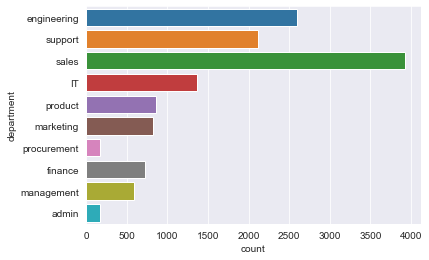

In [17]:
sns.countplot(y='department', data=df)
plt.show()

In [18]:
df.groupby('department').mean().sort_values(by='avg_monthly_hrs')

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_numeric
department,,,,,,,,
procurement,199.482759,0.183908,0.699205,3.885057,0.057471,0.627930,3.264368,0.557471
marketing,199.664225,0.159951,0.715018,3.687424,0.048840,0.629122,3.567766,0.620269
product,199.991860,0.151163,0.719616,3.817442,0.000000,0.628774,3.487209,0.577907
sales,200.842467,0.141728,0.711254,3.772878,0.024726,0.623075,3.527148,0.556207
support,200.975495,0.155042,0.723200,3.804430,0.008483,0.626923,3.394910,0.554194
management,201.025210,0.173109,0.729714,3.857143,0.114286,0.630428,4.294118,1.057143
finance,201.175824,0.119505,0.723880,3.815934,0.019231,0.586787,3.543956,0.641484
admin,201.272727,0.096591,0.726282,3.897727,0.028409,0.611450,3.369318,0.596591
IT,202.174453,0.140876,0.720017,3.810219,0.005109,0.628079,3.456204,0.572263


In [19]:
# Drop duplicates
df.drop_duplicates(inplace=True)
print(df.shape)

(14068, 11)


In [20]:
# Unique classes of 'department'
print(df.department.unique())

['engineering' 'support' 'sales' 'IT' 'product' 'marketing' 'procurement'
 'finance' nan 'management' 'admin']


In [21]:
# Print unique values of 'filed_complaint'
print(df.filed_complaint.unique())

# Print unique values of 'recently_promoted'
print(df.recently_promoted.unique())

[0. 1.]
[0. 1.]


In [22]:
# Display number of missing values by feature
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
salary_numeric          0
dtype: int64

In [23]:
# Fill missing values in department with 'Missing'
df['department'].fillna('Missing', inplace=True)

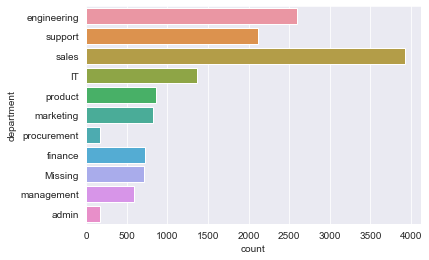

In [24]:
# Plot class distributions for 'department'
sns.countplot(y='department', data=df)
plt.show()

In [25]:
# Indicator variable for missing last_evaluation
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

In [26]:
# Fill missing values in last_evaluation with 0
df.last_evaluation.fillna(0, inplace=True)

In [27]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,salary_numeric,last_evaluation_missing
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,0,0
1,232,support,0.0,0.000000,3,0.0,low,0.834544,Employed,2.0,0,1
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,1,0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,0,0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,0,0


In [28]:
# Display number of missing values by feature
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
salary_numeric             0
last_evaluation_missing    0
dtype: int64

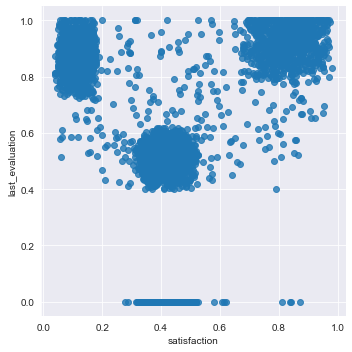

In [29]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction',
           y='last_evaluation',
           data=df[df.status == 'Left'],
           fit_reg=False)
plt.show()

In [30]:
# Create indicator features
df['underperformer'] = ((df.last_evaluation < 0.6) & 
                        (df.last_evaluation_missing == 0)).astype(int)

df['unhappy'] = (df.satisfaction < 0.2).astype(int)

df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)

In [31]:
# The proportion of observations belonging to each group
df[['underperformer', 'unhappy', 'overachiever']].mean()

underperformer    0.285257
unhappy           0.092195
overachiever      0.177069
dtype: float64

In [32]:
 # Convert status to an indicator variable
df['status'] = pd.get_dummies( df.status ).Left

In [33]:
# The proportion of observations who 'Left'
df.status.mean()

0.23933750355416547

In [34]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns=['department', 'salary'])

# Display first 10 rows
df.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,salary_numeric,last_evaluation_missing,underperformer,unhappy,overachiever,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,140,0.0,0.589097,4,0.0,0.660020,0,4.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,121,1.0,0.625399,3,0.0,0.835571,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,150,0.0,0.644586,4,0.0,0.796683,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8,215,1.0,0.524114,3,0.0,0.715005,0,7.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9,269,0.0,0.909364,5,0.0,0.994037,0,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [35]:
# Save analytical base table
df.to_csv('analytical_base_table.csv', index=None)

In [36]:
# Pickle for saving model files
import pickle

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# StandardScaler
from sklearn.preprocessing import StandardScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Classification metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [37]:
# Load analytical base table from Module 2
abt = pd.read_csv('analytical_base_table.csv')

In [38]:
# Create separate object for target variable
y = abt.status

# Create separate object for input features
X = abt.drop('status', axis=1)

In [39]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=abt.status)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

11254 2814 11254 2814


In [40]:
# Pipeline dictionary
pipelines = {
    'l2' : make_pipeline(StandardScaler(), 
                         LogisticRegression(penalty='l2' , random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

In [41]:
# Logistic Regression hyperparameters
l2_hyperparameters = {
    'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
}

# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf': [1, 3, 5, 10]
}

# Boosted Tree hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

In [42]:
# Create hyperparameters dictionary
hyperparameters = {
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

In [43]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

l2 has been fitted.
rf has been fitted.
gb has been fitted.


In [44]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print( name, model.best_score_ )

l2 0.8493863035326624
rf 0.9791186106177225
gb 0.9754757450167751


In [45]:
for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]
    
    print( name, roc_auc_score(y_test, pred) )

l2 0.9015402254018862
rf 0.991259586936712
gb 0.9886192104479654


In [46]:
# Save winning model as final_model.pkl
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

In [47]:
# Load final_model.pkl as model
with open('final_model.pkl', 'rb') as f:
    clf = pickle.load(f)

In [48]:
# Load analytical base table used in Modules 2 & 4
abt = pd.read_csv('analytical_base_table.csv')

In [49]:
# Create separate object for target variable
y = abt.status

# Create separate object for input features
X = abt.drop('status', axis=1)

# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=abt.status)

In [50]:
# Predict X_test
pred = clf.predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred = [p[1] for p in pred]

# Print AUROC
print('AUROC:', roc_auc_score(y_test, pred))

AUROC: 0.991259586936712


In [51]:
raw_data = pd.read_csv('unseen_raw_data.csv')

raw_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure
0,228,management,NaN,0.735618,2,NaN,high,0.805661,3.0
1,229,product,NaN,1.000000,4,NaN,low,0.719961,4.0
2,196,sales,1.0,0.557426,4,NaN,low,0.749835,2.0
3,207,IT,NaN,0.715171,3,NaN,high,0.987447,3.0
4,129,management,NaN,0.484818,2,NaN,low,0.441219,3.0


In [52]:
def clean_data(df):
        # Drop duplicates
        df = df.drop_duplicates()

        # Drop temporary workers
        df = df[df.department != 'temp']

        # Missing filed_complaint values should be 0
        df['filed_complaint'] = df.filed_complaint.fillna(0)

        # Missing recently_promoted values should be 0
        df['recently_promoted'] = df.recently_promoted.fillna(0)

        # 'information_technology' should be 'IT'
        df.department.replace('information_technology', 'IT', inplace=True)

        # Fill missing values in department with 'Missing'
        df['department'].fillna('Missing', inplace=True)

        # Indicator variable for missing last_evaluation
        df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

        # Fill missing values in last_evaluation with 0
        df.last_evaluation.fillna(0, inplace=True)

        # Return cleaned dataframe
        return df

In [53]:
cleaned_data = clean_data(raw_data)
cleaned_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,last_evaluation_missing
0,228,management,0.0,0.735618,2,0.0,high,0.805661,3.0,0
1,229,product,0.0,1.000000,4,0.0,low,0.719961,4.0,0
2,196,sales,1.0,0.557426,4,0.0,low,0.749835,2.0,0
3,207,IT,0.0,0.715171,3,0.0,high,0.987447,3.0,0
4,129,management,0.0,0.484818,2,0.0,low,0.441219,3.0,0


In [54]:
def engineer_features(df):
        # Create indicator features
        df['underperformer'] = ((df.last_evaluation < 0.6) & 
                                (df.last_evaluation_missing == 0)).astype(int)

        df['unhappy'] = (df.satisfaction < 0.2).astype(int)

        df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)

        # Create new dataframe with dummy features
        df = pd.get_dummies(df, columns=['department', 'salary'])

        # Return augmented DataFrame
        return df

In [55]:
augmented_data = engineer_features(cleaned_data)
augmented_data.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,last_evaluation_missing,underperformer,unhappy,overachiever,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,228,0.0,0.735618,2,0.0,0.805661,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,229,0.0,1.000000,4,0.0,0.719961,4.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,196,1.0,0.557426,4,0.0,0.749835,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,207,0.0,0.715171,3,0.0,0.987447,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,129,0.0,0.484818,2,0.0,0.441219,3.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [61]:
clf, pred = clf.predict(augmented_data)

pred = [p[1] for p in pred]
 
# Add prediction to dataset
df['prediction'] = pred

# Save dataset after making predictions
df.to_csv('predictions.csv', index=None)
print("preditions.csv created.")

ValueError: X has 25 features, but StandardScaler is expecting 26 features as input.